# EDA Guidelines

* Load in your csv.gz's of results for each year extracted.
   - Concatenate the data into 1 dataframe for the remainder of the analysis.

* Once you have your data from the API, they would like you to perform some light EDA to show:

1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

  * Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

2. How many movies are there in each of the certification categories (G/PG/PG-13/R)?

3. What is the average revenue per certification category?
4. What is the average budget per certification category?

# Import Library

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Retrieved Data

In [2]:
final_tmdb_data_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
final_tmdb_data_2000.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,2244.0,PG


In [7]:
final_tmdb_data_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1246 non-null   object 
 1   adult                  1245 non-null   float64
 2   backdrop_path          694 non-null    object 
 3   belongs_to_collection  117 non-null    object 
 4   budget                 1245 non-null   float64
 5   genres                 1245 non-null   object 
 6   homepage               63 non-null     object 
 7   id                     1245 non-null   float64
 8   original_language      1245 non-null   object 
 9   original_title         1245 non-null   object 
 10  overview               1224 non-null   object 
 11  popularity             1245 non-null   float64
 12  poster_path            1124 non-null   object 
 13  production_companies   1245 non-null   object 
 14  production_countries   1245 non-null   object 
 15  rele

In [3]:
final_tmdb_data_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
final_tmdb_data_2001.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.3,1198.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.0,3.0,NaN
3,tt0116916,0.0,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,73549.0,en,The Dark Mist,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.0,3.5,2.0,PG
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.5,126.0,PG-13


In [9]:
final_tmdb_data_2001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1338 non-null   object 
 1   adult                  1337 non-null   float64
 2   backdrop_path          722 non-null    object 
 3   belongs_to_collection  93 non-null     object 
 4   budget                 1337 non-null   float64
 5   genres                 1337 non-null   object 
 6   homepage               108 non-null    object 
 7   id                     1337 non-null   float64
 8   original_language      1337 non-null   object 
 9   original_title         1337 non-null   object 
 10  overview               1310 non-null   object 
 11  popularity             1337 non-null   float64
 12  poster_path            1205 non-null   object 
 13  production_companies   1337 non-null   object 
 14  production_countries   1337 non-null   object 
 15  rele

# Combine 2000 and 2001 data to 1 dataframe

In [4]:
# concatenate the data into 1 dataframe
tmdb_df = pd.concat([final_tmdb_data_2000, final_tmdb_data_2001], ignore_index=True)

In [6]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2584 non-null   object 
 1   adult                  2582 non-null   float64
 2   backdrop_path          1416 non-null   object 
 3   belongs_to_collection  210 non-null    object 
 4   budget                 2582 non-null   float64
 5   genres                 2582 non-null   object 
 6   homepage               171 non-null    object 
 7   id                     2582 non-null   float64
 8   original_language      2582 non-null   object 
 9   original_title         2582 non-null   object 
 10  overview               2534 non-null   object 
 11  popularity             2582 non-null   float64
 12  poster_path            2329 non-null   object 
 13  production_companies   2582 non-null   object 
 14  production_countries   2582 non-null   object 
 15  rele

# Exploratory Data Analysis

## 1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?


   * Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

In [11]:
#Prepare filters
zero_budget_filter = tmdb_df['budget'] == 0
zero_revenue_filter = tmdb_df['revenue'] == 0
    
zero_finance_filter = zero_budget_filter & zero_revenue_filter

In [13]:
# Display rows which did not have valid financial information
tmdb_df[zero_finance_filter].head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN


In [14]:
# exclude (filter out) movies with 0s for budget AND revenue
tmdb_df = tmdb_df[~zero_finance_filter]

In [15]:
# display the cleaned up dataframe
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 2559
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                641 non-null    object 
 1   adult                  639 non-null    float64
 2   backdrop_path          541 non-null    object 
 3   belongs_to_collection  111 non-null    object 
 4   budget                 639 non-null    float64
 5   genres                 639 non-null    object 
 6   homepage               76 non-null     object 
 7   id                     639 non-null    float64
 8   original_language      639 non-null    object 
 9   original_title         639 non-null    object 
 10  overview               637 non-null    object 
 11  popularity             639 non-null    float64
 12  poster_path            621 non-null    object 
 13  production_companies   639 non-null    object 
 14  production_countries   639 non-null    object 
 15  relea

**Answer**: 641 movies had at least some valid financial information (values > 0 for budget OR revenue).

## 2. How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [16]:
tmdb_df['certification'].value_counts()

R        232
PG-13    131
PG        35
NR        17
G         15
Name: certification, dtype: int64

**Answer**: 
   - R: 232 movies
   - PG-13: 131 movies
   - PG: 35 movies
   - NR: 17 movies
   - G: 15 movies

Text(0.5, 1.0, 'certification')

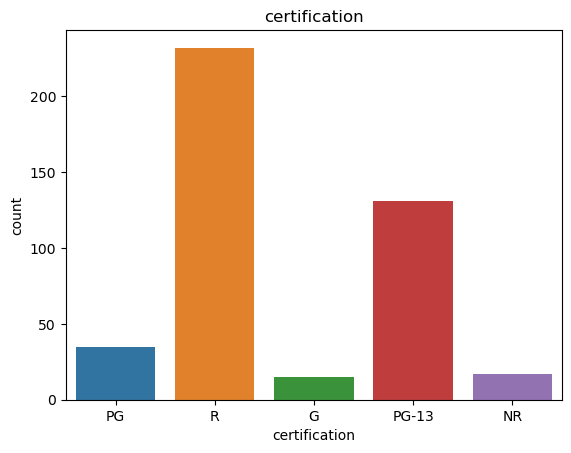

In [20]:
ax = sns.countplot(data=tmdb_df, x='certification')
ax.set_title('certification')

## 3. What is the average revenue per certification category?

In [23]:
avg_revenue_per_cert = tmdb_df.groupby('certification')['revenue'].mean()

In [28]:
avg_revenue_per_cert.sort_values(ascending = False)

certification
G        1.173648e+08
PG       1.106791e+08
PG-13    9.928786e+07
R        3.266001e+07
NR       9.588674e+06
Name: revenue, dtype: float64

## 4. What is the average budget per certification category?

In [25]:
avg_budget_per_cert = tmdb_df.groupby('certification')['budget'].mean()

In [27]:
avg_budget_per_cert.sort_values(ascending = False)

certification
PG       4.482849e+07
PG-13    4.299357e+07
G        3.813333e+07
R        1.945174e+07
NR       6.302358e+06
Name: budget, dtype: float64

# Save a final merged .csv.gz of all of the tmdb api data

In [29]:
## Save current dataframe to file.
tmdb_df.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)